## Simulated Annealing

<p style="text-indent: 1.5em"><b>시뮬레이티드 어닐링(simulated annealing, SA)</b>은 1983년 Kirkpatrick가 고체물리학의 어닐링(annealing)에서 영감을 얻어 개발한 메타휴리스틱스(metaheuristics)입니다. 시뮬레이티드 어닐링은 원리가 매우 단순하고 적용이 쉬워 최적화 문제 중 연속 또는 이산 문제 둘다 가능하며 매우 우수한 성능을 보여줍니다. 또한, 전역 최적해(global optimum)로의 수렴이 이론적으로 증명되어있습니다. 하지만 좋은 품질의 해를 도출하기 위해서는 계산소요시간이 매우 높다는 단점이 있습니다.</p>

<p style="text-indent: 1.5em">시뮬레이티드 어닐링이 개발되기 전 고체물리학에서 어닐링 과정은 이미 컴퓨터 시뮬레이션으로 모형화되어있었습니다. 1953년 Metropolis는 열탕에서 고체가 열평형(thermal equilibrium)에 도달하는 과정을 모사한 메트로폴리스 알고리즘을 제안했습니다.이러한 어닐링을 정리하면 다음과 같습니다.</p>

### 어닐링

<p style="text-indent: 1.5em">시뮬레이티드 어닐링에서 <b>어닐링(annealing)</b>을 정리하면 다음과 같습니다. 첫째, 고체를 열탕에서 액체 상태가 될 때까지 가열한 후 온도를 서서히 낮추어 가장 안정된 결정상태의 고체를 얻는 과정이며 둘째, 고체가 녹아 액체 상태가 되면 입자들이 자유롭게 움직이다가, 온도를 서서히 낮추면 기저상태(ground state)에 도달합니다. 셋째, 기저상태에서 입자들이 매우 구조화된 격자 형태로 배열되고 시스템의 에너지는 최소화됩니다. 넷째, 고체의 기저상태는 온도를 충분히 올린 후 냉각(cooling)이 아주 서서히 이루어질 때 가능하며 마지막으로 온도를 급격히 내리면 고체가 기저상태가 아니라 준안정상태(metastable state)로 언 상태로 변화합니다. 이러한 물리적 시스템과 최적화 문제의 유사점은 다음 <b>표 1</b>과 같습니다.</p>

<div style="text-align: center; padding-top: 1em; padding-bottom: 1em;"><b>표 1 </b>물리적 시스템과 최적화 문제의 유사점<br>
    <table align="center">
        <tr>
            <th>물리적 시스템(physical System)</th>
            <th>최적화 문제(optimization Problem)</th>
        </tr>
        <tr>
            <td>시스템 상태(system state)</td>
            <td>해(solution)</td>
        </tr>
        <tr>
            <td>에너지(energy)</td>
            <td>목적함수(objective function)</td>
        </tr>
        <tr>
            <td>기저 상태(ground state)</td>
            <td>전역 최적해(global solution)</td>
        </tr>
        <tr>
            <td>준안정 상태(meta-stable state)</td>
            <td>지역 최적해(local solution)</td>
        </tr>
        <tr>
            <td>온도(temperature)</td>
            <td>제어 파라미터(control parameter) $T$</td>
        </tr>
        <tr>
            <td>급냉각(rapid quenching)</td>
            <td>지역 탐색법(local search)</td>
        </tr>
    </table>
</div>

### 시뮬레이티드 어닐링의 구조

<p style="text-indent: 1.5em">시뮬레이티드 어닐링은 초기화 단계에서 초기온도($T$), 초기해($x_{0}$), 초기 반복수($L$) 등을 설정하며 $L$은 메트로폴리스 알고리즘에서의 고정된 온도 $T$에서 평형상태에 도달할 때까지 필요한 근접 변화(perturbation)의 반복수를 나타내는 파라미터입니다. 근접 변화는 이웃해의 탐색을 뜻하며 상태의 전이(transition)과 같은 개념입니다. 시뮬레이티드 어닐링은 외부루프와 내부루프로 구성되어 있으며 초기값이 결정되면 온도 $T$에서 현재해($x$)의 이웃해($x^{\prime}$)를 생성하여 이웃해의 목적함수 값 $f(x^{\prime})$이 현재해의 목적함수 값 $f(x)$보다 작으면 이웃해를 현재해로 받아들이고, 그렇지 않으면 확률로 개선되지 않은 해를 현재해로 받아들입니다. 이러한 내부루프를 $L$회 반복합니다. 그 후 외부루프에서 온도 $T$를 낮추고 종료 조건이 만족할 때까지 반복합니다. 이때 좋지 않은 해를 확률적으로 받아들이면서 지역 최적해를 탈출해 전역 최적해로 나아갈 가능성을 얻게 됩니다.</p>

<p style="text-indent: 1.5em">시뮬레이티드 어닐링의 핵심은 수락확률(acceptance probability)과 냉각 스케줄(cooling schedule)의 선택입니다. 수락확률은 개선되지 않은 이웃해로의 이동을 가능하게 하고, 냉각 스케줄은 알고리즘을 반복할때마다 온도 $T$를 적절하게 낮추는 방법을 말합니다. 그리고 메타휴리스틱스의 공통 요소를 순서대로 적용하는 것이 매우 중요합니다.</p>

#### 수락기준

<p style="text-indent: 1.5em">시뮬레이티드 어닐링은 현재해보다 더 좋은 이웃해가 있으면 이동하지만, 현재해보다 더 나쁜 이웃해를 확률적으로 받아들입니다. 나쁜 이웃해를 받아들이는 기준은 메트로폴리스를 사용합니다. 현재해 $x$와 이웃해 $x^{\prime}$로 그리고 목적함수 값은 $f(x)$와 $f(x^{\prime})$로 정의합니다. 현재해 $x$에서 이웃해 $x^{\prime}$으로 이동을 $f(x^{\prime}) \le f(x)$이거나 $\exp{(-\frac{f(x^{\prime}) - f(x)}{T})} \ge \text{random}(0,1)$이면 수락합니다. 따라서 내리막길에서 언덕을 다시 올라가듯이 수락확률로 현재해보다 나쁜 이웃해를 받아들이고 지역해에서 탈출하기 위한 현재해 $x$에서 이웃해 $x^{\prime}$로 이동은 다음과 같습니다.</p>

$$\begin{cases}
f(x^{\prime}) \le f(x),\\
\exp{(-\frac{f(x^{\prime}) - f(x)}{T})} \ge \text{random}(0,1)
\end{cases}$$

<p style="text-indent: 1.5em">목적함수 값 $\Delta = f(x^{\prime})-f(x)$가 $0$보다 크거나 같으면 $\exp(-\Delta/T)$를 확인하는데, 온도 $T$가 $\infty$면 이웃해 $x^{\prime}$를 받아들인 확률이 $1$이고 $T$가 $0$이면 수락 확률이 $0$이 되는 매커니즘입니다. 최적화 문제에서 목적함수 값을 최소화는 것은 $\Delta = f(x^{\prime})-f(x)$이며 최대화는 $\Delta = f(x)-f(x^{\prime})$입니다.</p>

#### 냉각 스케줄

<p style="text-indent: 1.5em">냉각 스케줄(cooling schedule)은 해의 성능에 큰 영향을 미치는데 적절한 냉각 스케줄을 선택하지 않으면 좋은 해를 구하기 어렵습니다. 대표적인 냉각 스케줄은 선형(linear) 스케줄, 기하(geometric) 스케줄, 로그(logarithmic) 스케줄 등이 있습니다. 먼저 냉각 스케줄의 방법을 선택하기 전에 초기 온도를 설정해야 합니다. 초기에는 온도 $T$가 매우 높기 때문에 수락확률이 높게 설정되어 대부분 이웃해를 받아들입니다. 초기 온도를 구하는 방법으로는 초기해의 목적함수 값으로 설정하는 방법, 실험을 통해 목적함수 값의 표준편차($\sigma$)를 이용하는 방법 등이 있습니다. 냉각 스케줄은 초기 온도$T_{0}$에서 $k$번째 강하된 $T_{k}$로 나타냅니다.</p>

* 선형 스케줄은 시뮬레이티드 어닐링에서 가장 간단한 방법으로 식(1)과 같으며, $\beta$는 양의 상수입니다.

$$\begin{equation}
T_{k}=T_{0}-k\beta
\end{equation}$$

* 기하 스케줄은 시뮬레이티드 어닐링에서 온도가 식(2)처럼 낮아집니다. 기하 스케줄은 온도를 내릴 때 온도의 강하율($\alpha$)를 사용하는데 일반적으로 $0.5$에서 $0.99$ 값이 사용됩니다.

$$\begin{equation}
T_{k}=\alpha T_{k-1} \quad k=1,2,\dots, \; 0 \lt \alpha \lt 1
\end{equation}$$

* 로그 스케줄은 식(3)과 같으며 $c$는 양의 상수입니다.

$$\begin{equation}
T_{k}=\frac{c}{\log{(k+1)}}
\end{equation}$$

#### 내부루프 반복수

<p style="text-indent: 1.5em">시뮬레이티드 어닐링은 외부루프와 내부루프가 존재하는데, 내부루프의 반복수는 주어진 온도에서 평형 상태에 이를 때까지의 반복 횟수를 뜻합니다. 온도 강하 전략과 밀접하게 관련있으며 온도의 하락 폭이 크면 각각의 온도에서 평형 상태의 목적함수 값의 차이가 커지기 때문에 각 온도에서 평형상태를 이루는 반복수가 많아집니다. 반면 온도의 하락 폭이 작으면 적은 반복에도 쉽게 평형 상태를 이룰 수 있습니다. 시뮬레이티드 어닐링은 계산소요시간이 길어지면 해의 품질이 향상되는데, 해의 향상을 얻을 때 내부루프의 반복수를 증가시크느 ㄴ 것보다 온도의 하락 폭을 줄이는 것이 좋습니다. 매 온도에서 평성상태에 도달하는데 요구되는 반복수는 문제의 크기에 따라 지수적으로 증가합니다. 따라서 적절한 내부루프의 반복수를 결정해야합니다. 첫째, 일반적인 방법으로 해의 크기에 일정한 상수를 곱하여 내부루프의 반복수가 일정하게 유지되는 정적(static) 방법이 있습니다. 둘째, 내부루프의 반복수가 상황에 따라 변하는 정응적 방법(adaptive method)로 해의 평균값이 빨리 떨어지는 온도에서는 더 멈물게 하는 개념을 사용하는 것입니다.</p>

#### 종료 조건

<p style="text-indent: 1.5em">시뮬레이티드 어닐링의 종료 조건(terminal condition)은 온도가 0에 도달할 때 멈추는 것입니다. 첫째, 종료 조건의 온도 $T$를 $0.01$로 설정하거나 둘째, 지금까지 발견한 가장 좋은 해가 개선되지 않으면 종료하는 것 그리고 수락확률이 일정 수준 이하로 떨어진 후에 해의 향상 여부에 따라 종료시점을 결정하는 것입니다. 온도가 떨어지면 수락확률이 $0$에 수렴되기 때문에 종료 조건의 온도까지 매우 오랜 시간이 걸립니다. 따라서 한계치 아래로 내려가면 카운터를 시작하여 일정한 카운터까지 더 좋은 해가 발견되지 않으면 종료하는 방식입니다.</p>

### 시뮬레이티드 어닐링의 절차

<p style="text-indent: 1.5em">시뮬레이티드 어닐링의 절차는 다음과 같습니다.</p>
   
<ul style="list-style-type: none;">
  <li><b>STEP 1: </b></li>
    <ol>
      <li>초기 온도 $T$와 내부루프 반복 수 $L$을 설정한다.</li>
      <li>초기 가능해 $x_0$을 구하고 현재해 $x=x_{0}$로 설정한다.</li>
      <li>냉각 스케줄링과 종료조건을 설정한다.</li>
    </ol>
  <li><b>STEP 2:</b></li>
    <ol>
      <li>현재해를 근접 변화시켜 이웃해를 생성한다.</li>
      <li>현재해와 이웃해의 목적함수 값 차이 $\Delta=f(x^{\prime})-f(x)$를 계산한다.</li>
      <li>$\Delta \le 0$이면 이웃해를 현재해로 두고 <b>STEP 3</b>, 그렇지 않으면 <b>STEP 2.4</b></li>
      <li>$\exp(-\delta/T) \ge \text{random}(0,1)$이면 이웃해를 현재해로 설정한다.</li>
    </ol>
  <li><b>STEP 3:</b></li>
    <ol>
      <li>외부루프 종료조건을 만족하면 종료하고, </li>
      <li>그렇지 않으면 냉각 스케줄링에 따라 𝑇를 조정한다.</li>
    </ol>
</ul>
    
    
### 파이썬으로 구현하는 시뮬레이티드 어닐링

In [2]:
from metaheuristics.problems import TravelingSalesman

cities = TravelingSalesman(100, 100, 10, 42).generate()
cities

array([[  0,  42,  73,  87,  66,  46,  91,  35,  62,  55],
       [ 42,   0, 108,  99,  84,  85,  98,  13,  72,  64],
       [ 73, 108,   0,  60,  46,  29,  71,  96,  60,  61],
       [ 87,  99,  60,   0,  21,  71,  11,  86,  27,  35],
       [ 66,  84,  46,  21,   0,  50,  29,  70,  16,  21],
       [ 46,  85,  29,  71,  50,   0,  80,  74,  58,  56],
       [ 91,  98,  71,  11,  29,  80,   0,  86,  29,  36],
       [ 35,  13,  96,  86,  70,  74,  86,   0,  59,  51],
       [ 62,  72,  60,  27,  16,  58,  29,  59,   0,   8],
       [ 55,  64,  61,  35,  21,  56,  36,  51,   8,   0]])

#### 해의 표현

<p style="text-indent: 1.5em">초기해의 표현 방법은 순열(permutation)을 사용했습니다.</p>

In [8]:
import numpy as np

solution = list(np.random.permutation(range(1, len(cities))))
solution.insert(0, 0)
print(route)

[0, 6, 3, 9, 7, 1, 5, 4, 8, 2]


#### 적합도 함수

<p style="text-indent: 1.5em">메타휴리스틱스로 분류된 기법들은 모두 목적함수(objective function)를 적합도함수(fitness function)이라고 표현하겠습니다. 적합도 함수는 다음과 같습니다.</p>

In [6]:
def fitness(solution):
    return np.sum([cities[i, j] for i, j in zip(solution, solution[1:] + [solution[0]])])

In [9]:
fitness(solution)

675

#### 근접 변환

<p style="text-indent: 1.5em">이웃해를 탐색하기 위한 방법으로 <a href="https://en.wikipedia.org/wiki/2-opt">2-opt</a>를 사용하였습니다. 이를 근접 변환(perturbation)이라고 합니다. 최적화에서 2-opt는 1958년 Croes가 외판원 문제의 최적해를 구하기 위해 처음 제안한 아주 간단한 지역 탐색 알고리즘입니다. 주요 아이디어는 <b>그림 1</b>과 같이 두 지점을 선택하여 두 지점 사이의 경로를 역순으로 정렬한 다음 교차하는 것입니다.</p>

<div style="text-align: center; padding-top: 1em; padding-bottom: 1em;"><img src="images/figures/sa-01.png" width="30%" /><br><b>그림 1 </b>2-opt 방법</div>

In [13]:
def two_opt(solution):
    new_solution = solution.copy()
    changed = True
    while changed:
        i = np.random.choice(range(1, len(solution)-2))
        j = np.random.choice(range(i+1, len(solution)))
        if j-i != 1:
            new_solution[i:j] = reversed(solution[i:j])
            changed = False
        else:
            continue
    return new_solution

In [14]:
print(solution)
print(two_opt(solution))

[0, 8, 5, 6, 4, 2, 7, 3, 1, 9]
[0, 8, 5, 6, 4, 2, 1, 3, 7, 9]


In [27]:
class SimulatedAnnealing:
    """Simulated Annealing
    """
    def __init__(self, cities, stop_temp, alpha, max_iter):
        self.cities = cities
        self.stop_temp = stop_temp
        self.alpha = alpha
        self.max_iter = max_iter  # internal loops
        self.history = []

    def _fitness(self, solution):
        return np.sum([self.cities[i, j] for i, j in zip(solution, solution[1:] + [solution[0]])])
        
    def _two_opt(self, solution):
        new_solution = solution.copy()
        changed = True
        while changed:
            i = np.random.choice(range(1, len(solution)-2))
            j = np.random.choice(range(i+1, len(solution)))
            if j-i != 1:
                new_solution[i:j] = reversed(solution[i:j])
                changed = False
            else:
                continue
                
        return new_solution

    def _acceptance_probability(self, delta):
        return np.exp(-delta / self.temp)

    def solve(self):
        # Initial solution
        initial_solution = list(np.random.permutation(range(1, len(self.cities))))
        initial_solution.insert(0, 0)
        self.initial_value = self._fitness(initial_solution)

        current_solution = initial_solution
        current_value = self.initial_value
               
        # Initial temperature
        self.temp = self.initial_value
        while self.temp >= self.stop_temp:
            for i in range(self.max_iter):
                candidate_solution = self._two_opt(current_solution)
                candidate_value = self._fitness(candidate_solution)
                
                delta = candidate_value - current_value
                if delta <= 0:
                    current_solution = candidate_solution
                    current_value = candidate_value
                                      
                elif self._acceptance_probability(delta) >= np.random.random():
                    current_solution = candidate_solution
                    current_value = candidate_value

            self.temp = self.alpha * self.temp
            self.history.append(current_value)
        return current_value

In [32]:
simulated_annealing = SimulatedAnnealing(cities, 0.001, 0.99, 30)
simulated_annealing.solve()

296

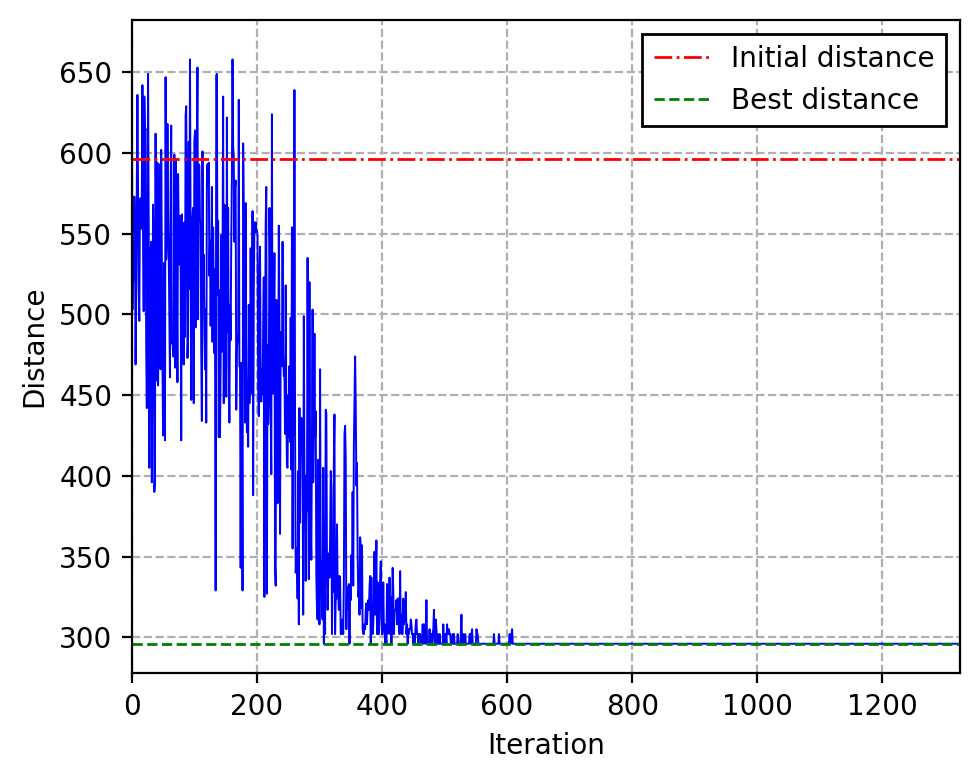

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,4), dpi=200)

ax.plot(range(len(simulated_annealing.history)), simulated_annealing.history, lw=0.7, c='b')

ax.axhline(y=simulated_annealing.initial_value, c='r', lw=1, ls='-.', label='Initial distance')
ax.axhline(y=min(simulated_annealing.history), c='g', lw=1, ls='--', label='Best distance')

ax.set_xlim([0, len(simulated_annealing.history)])
ax.set_xlabel('Iteration')
ax.set_ylabel('Distance')
ax.grid(axis='both', linestyle='--')
ax.legend(loc='upper right', frameon=True, shadow=False, 
          fancybox=False, ncol=1, framealpha=1, edgecolor='black')
fig.tight_layout()
plt.show()
fig.savefig('sa.png', dpi=300)

<div style="text-align: center; padding-top: 1em; padding-bottom: 1em;"><img src="images/figures/sa-02.png" width="50%" /><br><b>그림 2 </b>시뮬레이티드 어닐링의 최적해</div>

<p style="text-indent: 1.5em">시뮬레이티드 어닐링이 동작하면서 최적해를 찾아 수렴하는 과정을 시각화하면 <b>그림 2</b>와 같습니다. 초기온도가 높기 때문에 초기해보다 나쁜 해를 받아들이면서 지역 최적해를 벗어나는 것을 볼 수가 있습니다. 하지만, 앞서 말했듯이 시뮬레이티드 어닐링은 오랜 시간이 걸릴 수록 좋은 해를 찾습니다. 따라서 현재 입력된 파라미터는 최적해보다 근사해를 받아들일 경우가 더 많을 것 입니다. 이웃해를 찾는 과정, 냉각 스케줄, 그리고 내부루프 반복수를 조절하는 것이 좋을 수가 있습니다.</p>

### 결론

<p style="text-indent: 1.5em">시뮬레이티드 어닐링 개념과 절차 그리고 파이썬을 이용하여 구현해보았습니다. 시뮬레이티드 어닐링의 절차를 구현하는 건 매우 쉬우나, 해의 표현, 적합도 함수 정의 그리고 이웃해를 탐색할 규칙을 정하는 것이 매우 고민되는 문제입니다.</p>

### 참고문헌

1. Cover: http://examples.gurobi.com/traveling-salesman-problem/
2. Kirkpatrick, S., Gelatt, C. D., & Vecchi, M. P. (1983). Optimization by Simulated Annealing. _Science_, 220(4598), 671-680.
3. Eglese, R. W. (1990). Simulated Annealing: A Tool for Operational Research. _European Journal of Operational Research_, 46(3), 271-281.
4. Hillier, F. S. & Lieberman, G. J. (2013). _Introduction to Operations Research_. McGraw-Hill Science, Engineering & Mathematics.
5. Luke, S. (2013). _Essentials of Metaheuristics_.
6. 김여근 (2017). _메타휴리스틱스_. 전남대학교출판부.